<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p001_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [81]:
print(tf.__version__)
%load_ext tensorboard
# Clear any logs from previous runs
!rm -rf ./logs/ 

2.8.0
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [82]:
# Apparemment faut charger une classe
# Pour ensuite appliquer une méthode afin de télécharger le dataset
x = tf.keras.datasets.fashion_mnist
(train_features,train_labels),(test_features,test_labels) = x.load_data()

In [83]:
# Print les shapes des datastructures
# Définition des modalités voir dans l'affichage de la doc
print(training_dataset[0].shape, training_dataset[1].shape, test_set[0].shape, test_set[1].shape)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


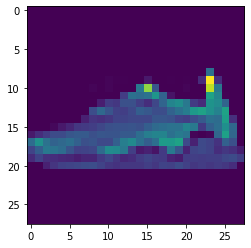

n° 9240  :  Sneaker


In [84]:
# Pour afficher l'observation n° index
index = np.random.randint(len(train_features))
plt.figure()
plt.imshow(train_features[index],cmap="viridis") # tu peux changer la palette ici, gray, viridis, inferno, binary
plt.show()
print("n°",index," : ",class_names[train_labels[index]])
# En gros la valeur des pixels va de 0 à 255, ce sont des nuances de gris
# 0 : noir
# 255 : blanc

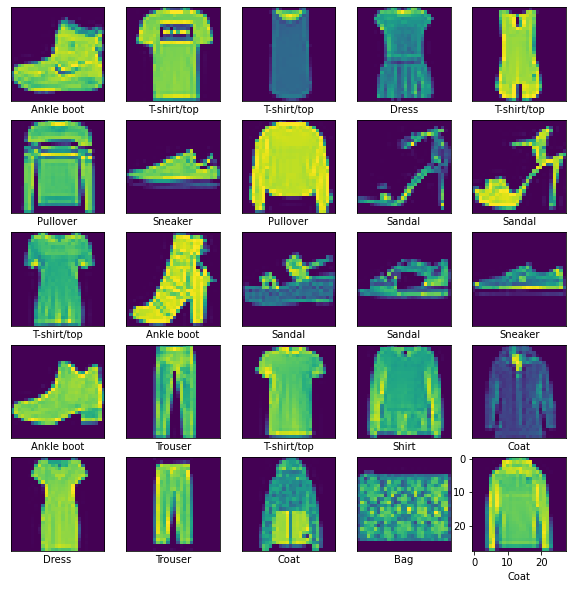

In [85]:
from IPython.core.pylabtools import figsize
# On peut vouloir afficher une grille d'images grâce à la fonction subplot, on choisit dans quelle case on veut afficher telle image
# plt.figure(figsize=(10,10)) permet de déterminer la taille de l'image
plt.figure(figsize=(10,10))
for i in range(25):
  plt.xticks([])
  plt.yticks([]) # pour avoir la place de placer le label
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.imshow(train_features[i],cmap="viridis")
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [86]:
# Définition de l'architecture du modèle
# Prend une liste de layers
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                            tf.keras.layers.Dense(128,activation="relu"),
                            tf.keras.layers.Dense(10)]) # Assume implicitement qu'il s'agit de classification, peut-être à cause des entiers


In [87]:
# Compilation du modèle
# Rajout des optimizers,loss et métrics
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), #SparseCategorical à utiliser dans le cas ou le cluster est codé en integers
              metrics=['accuracy'])

In [ ]:
# On crée un folder pour stocker les informations durant le training
# On Définit un tensorboard callback qu'on appellera durant le training
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.7913 - accuracy: 0.7113 - val_loss: 0.8542 - val_accuracy: 0.6879
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6728 - accuracy: 0.7553 - val_loss: 0.6201 - val_accuracy: 0.7794
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5614 - accuracy: 0.8040 - val_loss: 0.5900 - val_accuracy: 0.8150
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5179 - accuracy: 0.8237 - val_loss: 0.5769 - val_accuracy: 0.8088
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5033 - accuracy: 0.8293 - val_loss: 0.6532 - val_accuracy: 0.7780
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4912 - accuracy: 0.8317 - val_loss: 0.5342 - val_accuracy: 0.8244
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4845 - accuracy: 0.8349 - val_loss: 0.5981 - val_accuracy:

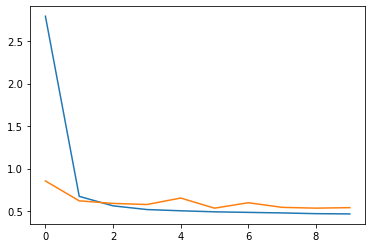

In [89]:
# Entraînement du model
history = model.fit(x=train_features, 
          y=train_labels, 
          epochs=10, 
          validation_data=(test_features, test_labels), 
          callbacks=[tensorboard_callback])

In [ ]:
# On lance le tensorboard pour visualiser les métriques de l'apprentissage
%tensorboard --logdir=logs/fit/